# Car Price Prediction

#### Car Price Prediction Using Randon Forest Regression Model

In [1]:
# Importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

###### Collected the enterprise.com dataset by performing web scraping 

In [2]:
# Reading the dataset
df = pd.read_csv("carpricepred_output.csv")

In [3]:
# Printing the output of 5 rows
df.head()

,Car Count,Vehicle ID,Name,Model,Year,Stock Number,Mileage,Fuel Type,MPG City,MPG Highway,Vehicle Type,Price
0,1,5NPD84LF9LH558602,Hyundai,Hyundai Elantra,2020,7TKXN4,74109,Gasoline,30,40,Sedan,"15,999"
1,2,3N1CN8EV1ML820004,Nissan,Nissan Versa,2021,7VXB5F,67039,Gasoline,32,40,Sedan,"16,499"
2,3,5NPD84LF6LH582422,Hyundai,Hyundai Elantra,2020,7TR9YD,68441,Gasoline,30,40,Sedan,"16,499"
3,4,KNDJ23AU3L7004394,Kia,Kia Soul,2020,8C1NYT,63093,Gasoline,29,35,Hatchback,"16,799"
4,5,KNDJ23AU5L7708161,Kia,Kia Soul,2020,8DR9G9,68335,Gasoline,29,35,Hatchback,"16,999"


In [4]:
# Printing the information or overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car Count     2400 non-null   int64 
 1   Vehicle ID    2400 non-null   object
 2   Name          2400 non-null   object
 3   Model         2400 non-null   object
 4   Year          2400 non-null   int64 
 5   Stock Number  2400 non-null   object
 6   Mileage       2400 non-null   int64 
 7   Fuel Type     2400 non-null   object
 8   MPG City      2400 non-null   int64 
 9   MPG Highway   2400 non-null   int64 
 10  Vehicle Type  2400 non-null   object
 11  Price         2400 non-null   object
dtypes: int64(5), object(7)
memory usage: 225.1+ KB


In [6]:
# Summary statistics of the dataset
df.describe()

,Car Count,Year,Mileage,MPG City,MPG Highway
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,1200.500000,2020.411250,58063.221667,23.890000,31.117083
std,692.964646,0.926453,15025.715443,6.179507,7.250134
min,1.000000,2015.000000,210.000000,0.000000,0.000000
25%,600.750000,2020.000000,58267.000000,20.000000,28.000000
50%,1200.500000,2021.000000,61587.000000,25.000000,31.000000
75%,1800.250000,2021.000000,65163.500000,28.000000,37.000000
max,2400.000000,2023.000000,99570.000000,74.000000,66.000000


In [7]:
# Handling missing values if any
df = df.dropna()
df

,Car Count,Vehicle ID,Name,Model,Year,Stock Number,Mileage,Fuel Type,MPG City,MPG Highway,Vehicle Type,Price
0,1,5NPD84LF9LH558602,Hyundai,Hyundai Elantra,2020,7TKXN4,74109,Gasoline,30,40,Sedan,"15,999"
1,2,3N1CN8EV1ML820004,Nissan,Nissan Versa,2021,7VXB5F,67039,Gasoline,32,40,Sedan,"16,499"
2,3,5NPD84LF6LH582422,Hyundai,Hyundai Elantra,2020,7TR9YD,68441,Gasoline,30,40,Sedan,"16,499"
3,4,KNDJ23AU3L7004394,Kia,Kia Soul,2020,8C1NYT,63093,Gasoline,29,35,Hatchback,"16,799"
4,5,KNDJ23AU5L7708161,Kia,Kia Soul,2020,8DR9G9,68335,Gasoline,29,35,Hatchback,"16,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2396,1N4BL4BV6MN301547,Nissan,Nissan Altima,2021,8CSJ9F,59583,Gasoline,28,39,Sedan,"19,499"
2396,2397,3C4NJCCB9MT567219,Jeep,Jeep Compass,2021,8FBX26,65832,Gasoline,22,31,Crossover,"20,299"
2397,2398,2GNAXKEV0M6116903,Chevrolet,Chevrolet Equinox,2021,7T3HK9,58689,Gasoline,26,31,Crossover,"20,499"
2398,2399,1N4BL4DV6MN318863,Nissan,Nissan Altima,2021,8CSH8G,61789,Gasoline,27,37,Sedan,"20,499"


### Exploratory Data Analysis 
###### Using Plotting methods

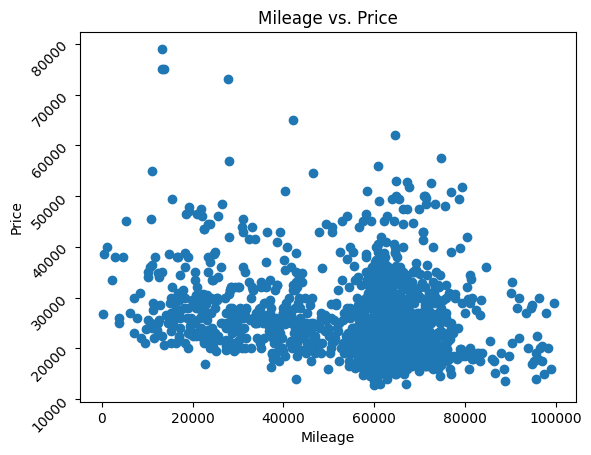

In [45]:
# Plot a scatter plot of mileage vs. price
plt.scatter(df['Mileage'], df['Price'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs. Price')
plt.yticks(rotation=45, ha="right")
plt.show()

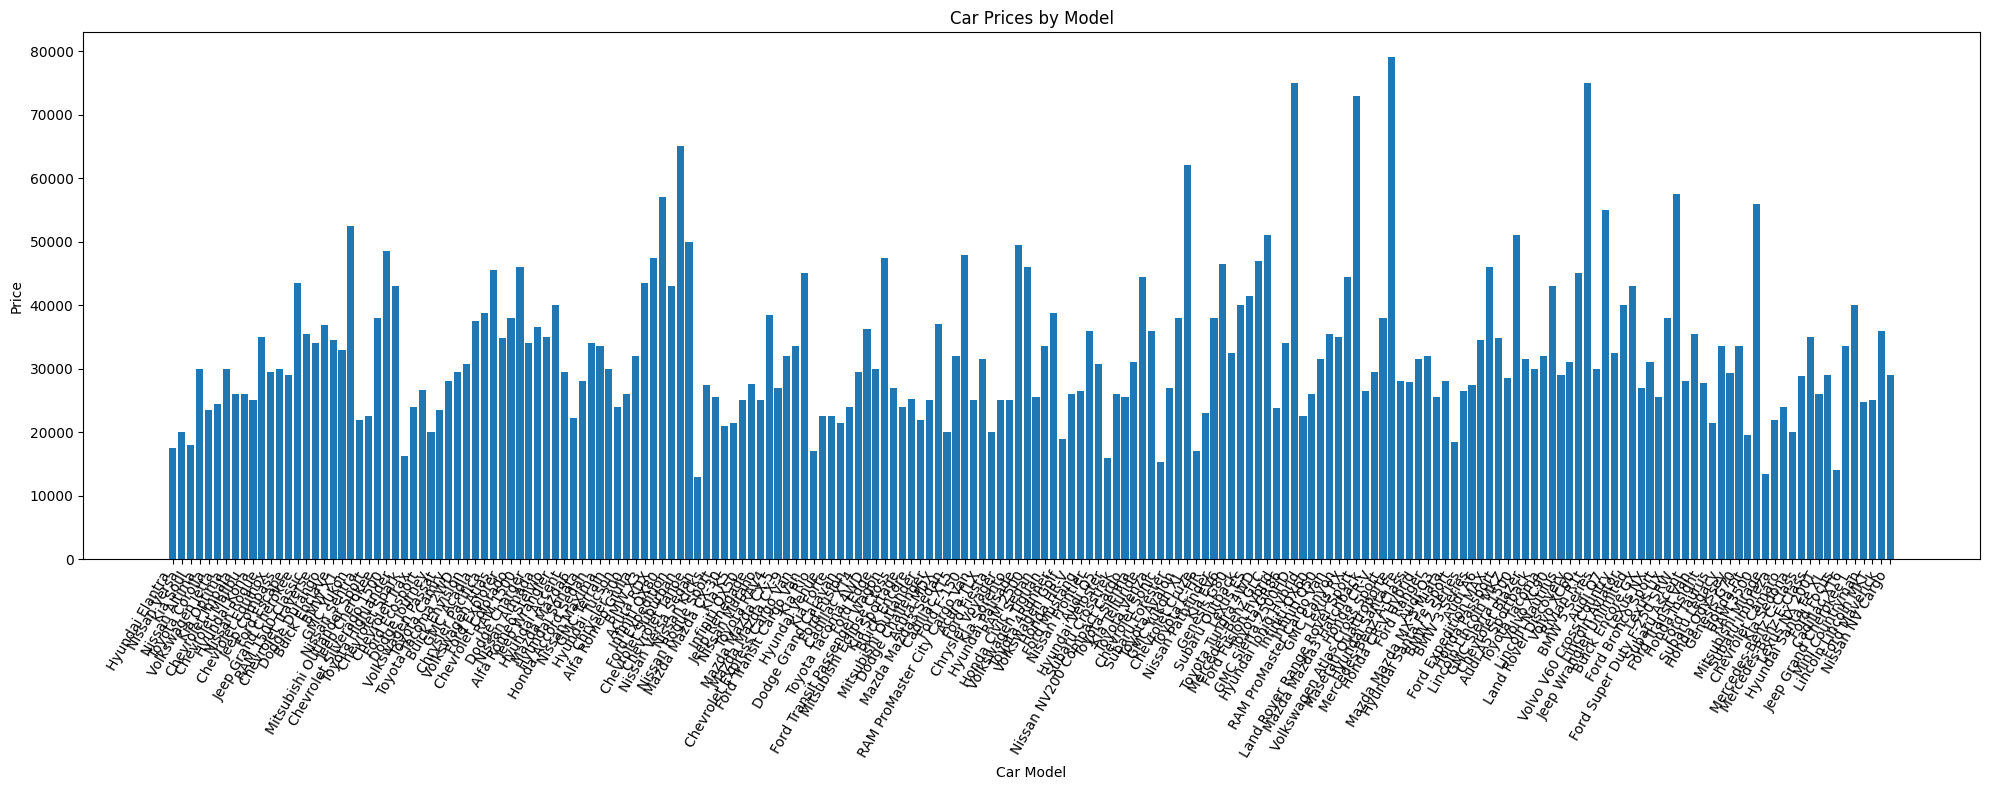

In [49]:
# plotting the bar graph for car models according with price 
plt.figure(figsize=(20, 8))
plt.bar(df['Model'], df['Price'])
plt.xlabel("Car Model")
plt.ylabel("Price")
plt.title("Car Prices by Model")
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.show()

In [10]:
#This code line converts the 'Price' column in the DataFrame 'df' from a string type to an integer type, removing any commas in the process.
df['Price']=df['Price'].str.replace(',','').astype(int)

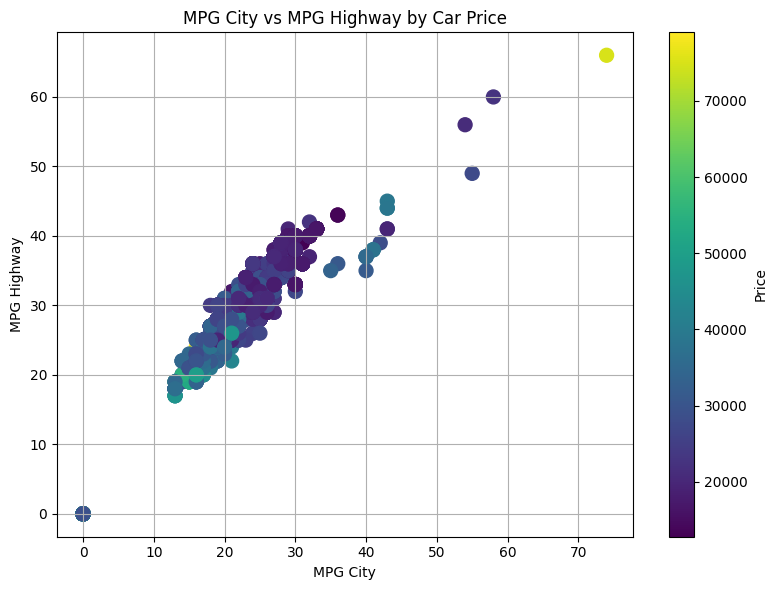

In [11]:
# Scatter plot for MPG City vs MPG Highway
plt.figure(figsize=(8, 6))
plt.scatter(df["MPG City"], df["MPG Highway"], s=100, c=df["Price"], cmap="viridis")
plt.colorbar(label="Price")
plt.xlabel("MPG City")
plt.ylabel("MPG Highway")
plt.title("MPG City vs MPG Highway by Car Price")
plt.grid(True)
plt.tight_layout()
plt.show()

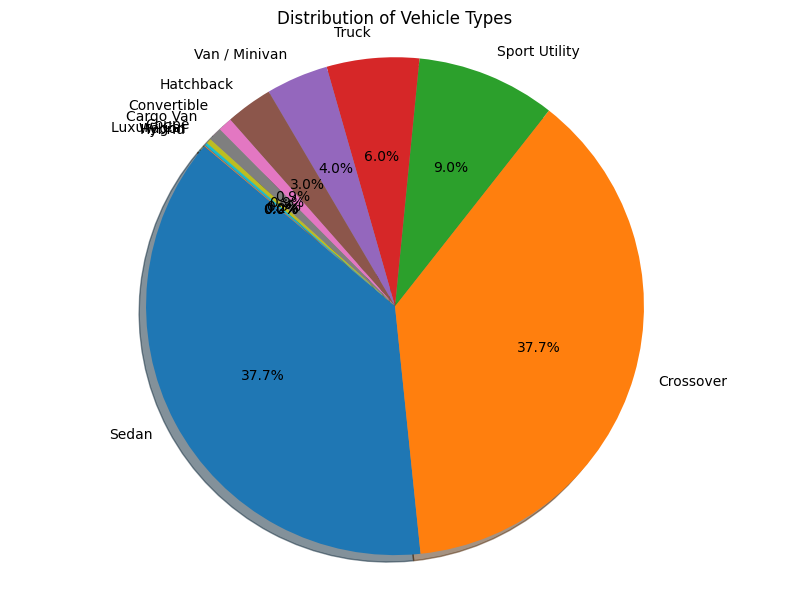

In [12]:

# Pie chart for vehicle types distribution
plt.figure(figsize=(8, 6))
vehicle_type_counts = df["Vehicle Type"].value_counts()
plt.pie(vehicle_type_counts, labels=vehicle_type_counts.index, autopct="%1.1f%%", startangle=140, shadow=True)
plt.axis("equal")
plt.title("Distribution of Vehicle Types")
plt.tight_layout()
plt.show()


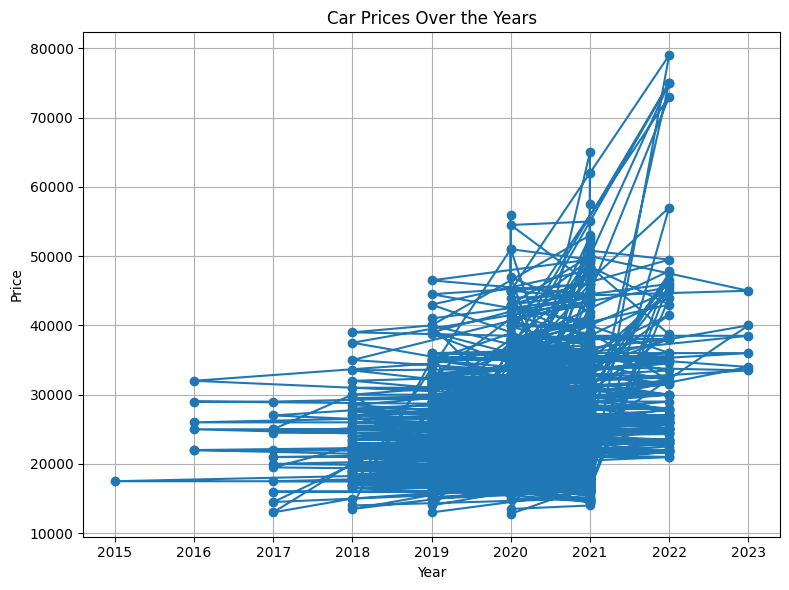

In [13]:
# Line plot for car prices over the years
plt.figure(figsize=(8, 6))
years = df["Year"]
prices = df["Price"]
plt.plot(years, prices, marker="o", linestyle="-")
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Car Prices Over the Years")
plt.grid(True)
plt.tight_layout()
plt.show()

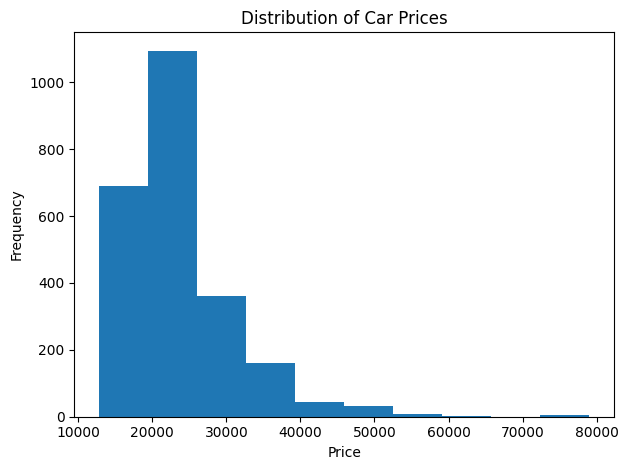

In [14]:
# Convert 'Price' column to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Remove rows with missing values in 'Price' column
df = df.dropna(subset=['Price'])

# Plot the distribution of car prices
plt.hist(df['Price'], bins=10, range=(df['Price'].min(), df['Price'].max()))
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
plt.tight_layout()  # Adjust spacing to prevent label overlap
plt.show()

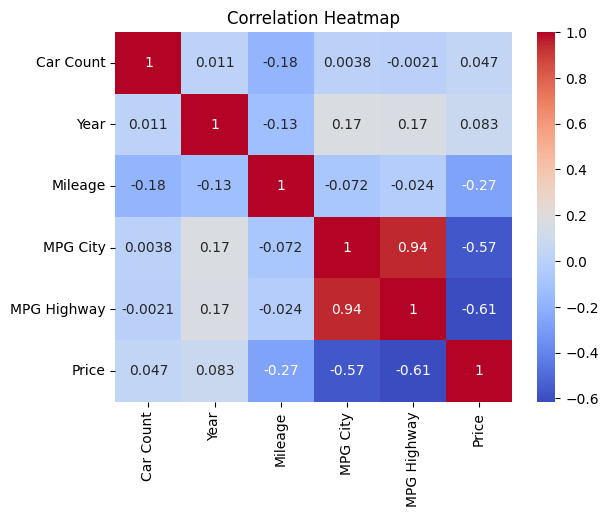

In [15]:
# Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

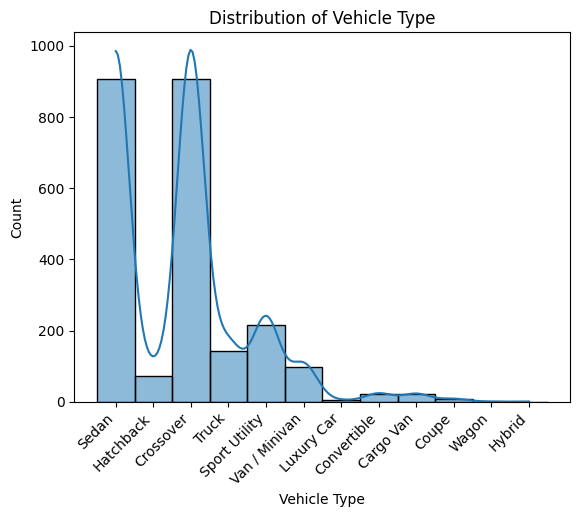

In [19]:
# Distribution plots
sns.histplot(df['Vehicle Type'], kde=True)
plt.title('Distribution of Vehicle Type')
plt.xticks(rotation=45, ha="right")
plt.show()

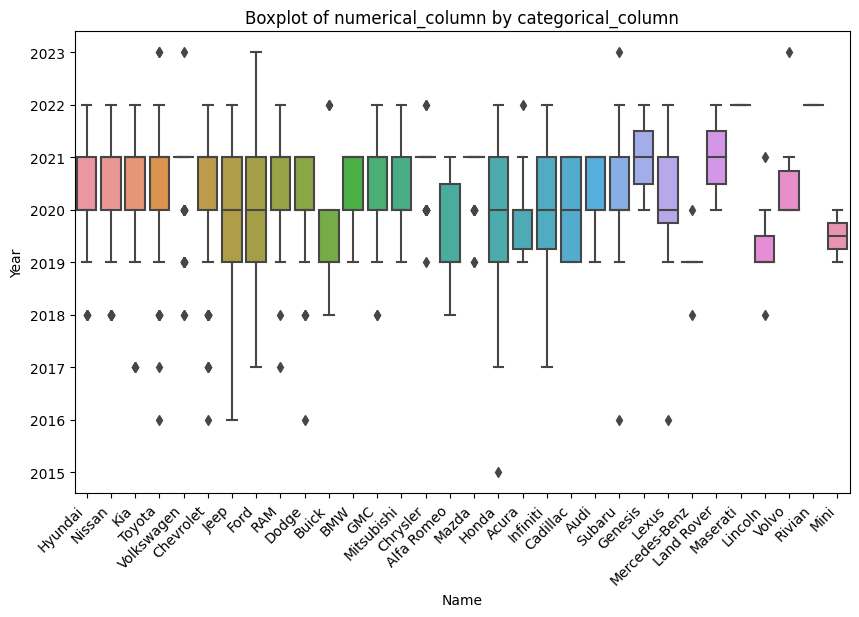

In [40]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Name', y='Year', data=df)
plt.title('Boxplot of numerical_column by categorical_column')
plt.xticks(rotation=45, ha="right")
plt.show()

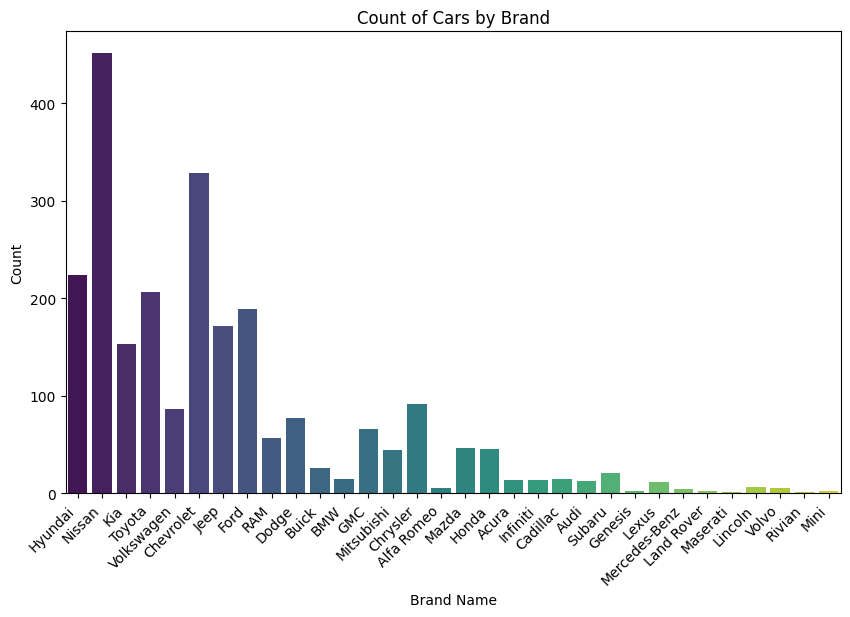

In [39]:
# Countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Name', data=df, palette='viridis')
plt.xlabel('Brand Name')
plt.ylabel('Count')
plt.title('Count of Cars by Brand')
plt.xticks(rotation=45, ha="right")
plt.show()

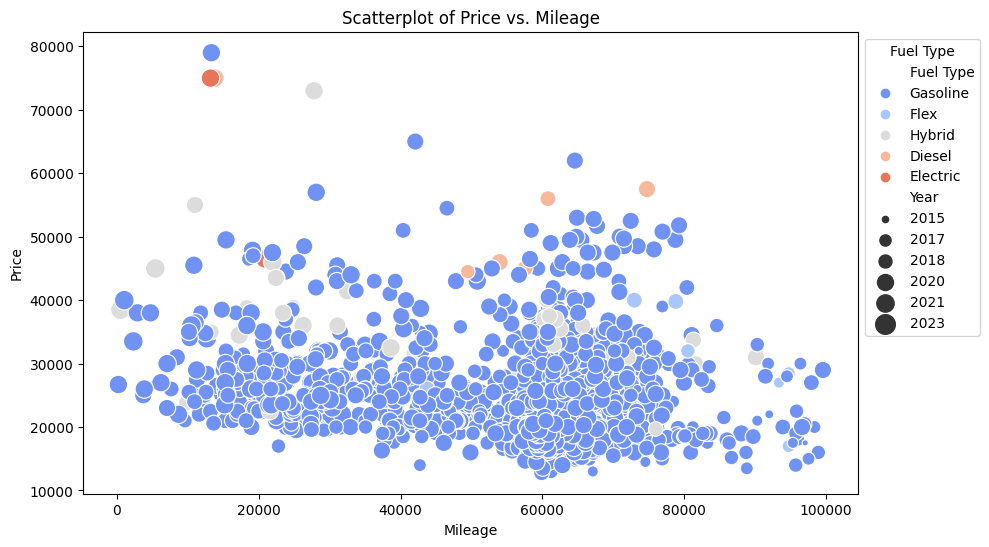

In [41]:
# Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='Price', data=df, hue='Fuel Type', size='Year', palette='coolwarm', sizes=(20, 200))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Scatterplot of Price vs. Mileage')
plt.legend(title='Fuel Type', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

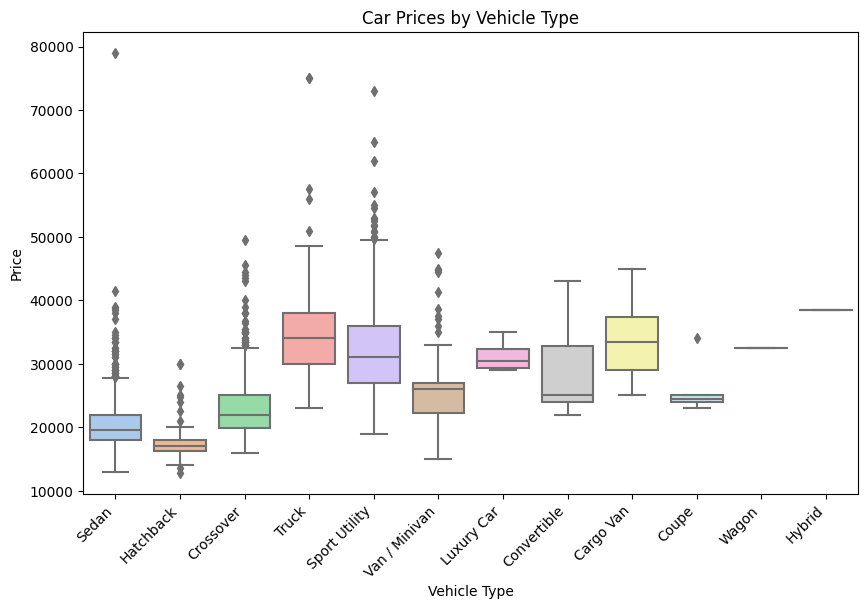

In [43]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle Type', y='Price', data=df, palette='pastel')
plt.xlabel('Vehicle Type')
plt.ylabel('Price')
plt.title('Car Prices by Vehicle Type')
plt.xticks(rotation=45, ha="right")
plt.show()

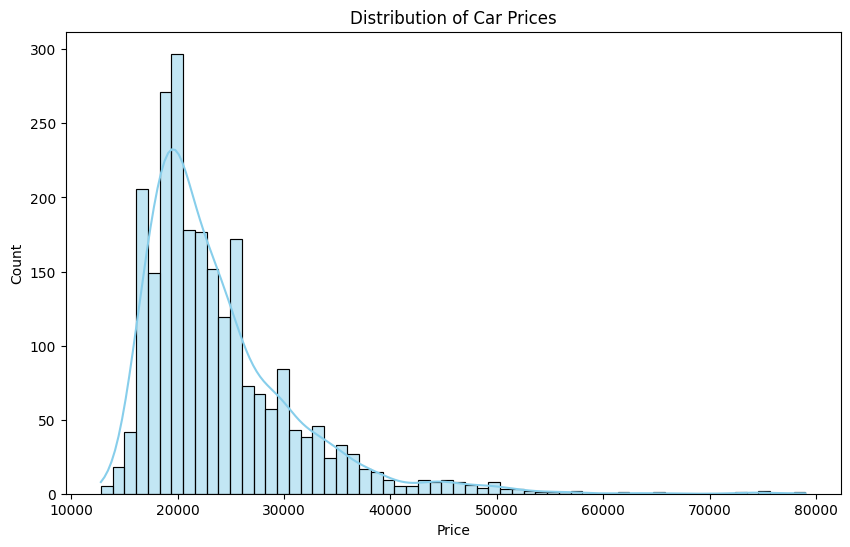

In [44]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, color='skyblue')
plt.xlabel('Price')
plt.title('Distribution of Car Prices')
plt.show()

In [50]:
# Dropping unnecessary columns
df = df.drop(['Car Count', 'Vehicle ID', 'Stock Number', 'Fuel Type', 'MPG City', 'MPG Highway', 'Vehicle Type'], axis = 1)

In [51]:
df

,Name,Model,Year,Mileage,Price
0,Hyundai,Hyundai Elantra,2020,74109,15999
1,Nissan,Nissan Versa,2021,67039,16499
2,Hyundai,Hyundai Elantra,2020,68441,16499
3,Kia,Kia Soul,2020,63093,16799
4,Kia,Kia Soul,2020,68335,16999
...,...,...,...,...,...
2395,Nissan,Nissan Altima,2021,59583,19499
2396,Jeep,Jeep Compass,2021,65832,20299
2397,Chevrolet,Chevrolet Equinox,2021,58689,20499
2398,Nissan,Nissan Altima,2021,61789,20499


#### After performing data preprocessing and exploratory data analysis. I performed the drop() to remove unnecessary columns which are not required for further analysis and saved that other csv file "carpricepred_cleaned.csv".  

In [60]:
df.to_csv('carpricepred_cleaned.csv')

In [52]:
df.head()

,Name,Model,Year,Mileage,Price
0,Hyundai,Hyundai Elantra,2020,74109,15999
1,Nissan,Nissan Versa,2021,67039,16499
2,Hyundai,Hyundai Elantra,2020,68441,16499
3,Kia,Kia Soul,2020,63093,16799
4,Kia,Kia Soul,2020,68335,16999


### --------------------------------------------------------------------------------------------------------------------------------------------------------------

# Machine Learning Algorithms
##### Performed the comparison of Linear Regression, Random forest, K neighbors, SVR in  "ML alog.ipynb"

### -------------------------------------------------------------------------------------------------------------------------------------------------------------

#### After performing the comparision of ML algorithms, I decided to use the Random Forest Model for the Car Price Prediction because mse, mae, r2 values of that algorithm are higher than other machine learning algorithms. Random Forest Model Evaluation:
#### Mean Squared Error: 9350622.81
#### Mean Absolute Error: 1818.47
#### R-squared: 0.79 

####  Extracting the training data.
####  DataFrame X is created, containing columns 'Name', 'Model', 'Year', and 'Mileage', and the Series y is created, containing the 'Price' column data.

In [56]:
X=df[['Name','Model','Year','Mileage']]
y=df['Price']

In [57]:
X.head(10)

,Name,Model,Year,Mileage
0,Hyundai,Hyundai Elantra,2020,74109
1,Nissan,Nissan Versa,2021,67039
2,Hyundai,Hyundai Elantra,2020,68441
3,Kia,Kia Soul,2020,63093
4,Kia,Kia Soul,2020,68335
5,Nissan,Nissan Altima,2018,72923
6,Toyota,Toyota Corolla,2020,68693
7,Volkswagen,Volkswagen Jetta,2021,66688
8,Toyota,Toyota Corolla,2020,63396
9,Nissan,Nissan Altima,2020,73205


In [58]:
y.shape

(2400,)

#### Splitting Test Train 

In [59]:
#  Import the train_test_split function from sklearn.model_selection module, which allows us to split the dataset into training and testing sets.
from sklearn.model_selection import train_test_split
# Split the data X and corresponding labels y into training and testing sets, where the testing set size is 20% of the entire dataset. The resulting splits are assigned to the variables X_train, X_test, y_train, and y_test.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [60]:
# Importing RandomForestRegressor from sklearn.ensemble module to use the Random Forest regression algorithm in the scikit-learn library.
from sklearn.ensemble import RandomForestRegressor

In [61]:
# Importing necessary modules from scikit-learn to perform data preprocessing, create a column transformer, build a machine learning pipeline, and evaluate the model's performance using the R-squared (r2_score) metric.
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

#### Creating an OneHotEncoder object to contain all the possible categories
#### An instance of the OneHotEncoder class is created and then used to fit the categorical data from columns 'Name' and 'Model' in the DataFrame X. The fit method of the OneHotEncoder is used to learn the encoding rules from the provided data, so that it can be later transformed into binary one-hot encoded representations.

In [62]:
ohe=OneHotEncoder()
ohe.fit(X[['Name','Model']])

OneHotEncoder()

#### Creating a column transformer to transform categorical columns
#### column_trans is a ColumnTransformer that performs one-hot encoding on 'Name' and 'Model' columns, while keeping the remaining columns unchanged ('passthrough').

In [63]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Name','Model']),
                                    remainder='passthrough')

#### Random Forest Model
##### A random regression model is an extension of random forests for regression tasks. It leverages multiple decision trees to predict continuous numerical values, making it a powerful and versatile algorithm for capturing complex relationships in data and handling non-linear regression problems.

In [66]:
# a random regression model is created and initialized as rf using the RandomForestRegressor() constructor from scikit-learn. The model is ready to be trained on data to make predictions for regression tasks.
rf = RandomForestRegressor()

In [68]:
# Making pipeline
pipe=make_pipeline(column_trans,rf)

In [69]:
# Fitting the model
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Acura', 'Alfa Romeo', 'Audi', 'BMW', 'Buick', 'Cadillac',
       'Chevrolet', 'Chrysler', 'Dodge', 'Ford', 'GMC', 'Genesis',
       'Honda', 'Hyundai', 'Infiniti', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'Lincoln', 'Maserati', 'Mazda', 'Mercedes-...
       'Toyota Highlander', 'Toyota RAV4', 'Toyota Sienna',
       'Toyota Tacoma', 'Toyota Tacoma 2WD', 'Toyota Tacoma 4WD',
       'Toyota Tundra 4WD', 'Toyota Venza', 'Volkswagen Atlas',
       'Volkswagen Atlas Cross Sport', 'Volkswagen Golf',
       'Volkswagen Jetta', 'Volkswagen Passat', 'Volkswagen Tiguan',
       'Volvo V60 Cross Country', 'Volvo XC60', 'Volvo XC90'],
      dtype=object)]),
                                                  ['Name', 'Model'])])),
                ('ra

In [70]:
y_pred=pipe.predict(X_test)

In [71]:
# Checking r2 score
r2_score(y_test,y_pred)

0.6773307143861925

In [72]:
# Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.91 as r2_score

# Running a for loop (1000 iterations) to split the data into training and testing sets, trains a Random Forest 
# regression model using pipelines and column transformers, predicts on the test set, and appends the 
# R-squared scores of the predictions to the scores list.

scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    rf = RandomForestRegressor()
    pipe=make_pipeline(column_trans,rf)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [73]:
import numpy as np

# finding the index of the maximum R-squared score from the scores list.
np.argmax(scores)

598

In [74]:
# retrieves the maximum R-squared score from the scores list using the index obtained from np.argmax(scores).
scores[np.argmax(scores)]

0.9109265464920591

In [77]:
# using the trained pipe (pipeline) to predict the target variable using a new input data (Nissan, Kicks, 2019, 64076) represented as a pandas DataFrame.

pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Nissan','Nissan Kicks',2019,64076]).reshape(1,4)))

array([16195.74])

#### the data is split into training and testing sets, and a Random Forest regression model is trained using the pipe (pipeline). The model's predictions are then evaluated using the R-squared (coefficient of determination) metric on the test set, providing a measure of the model's performance.

In [78]:
# The best model is found at a certain random state
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
rf = RandomForestRegressor()
pipe=make_pipeline(column_trans,rf)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.9116996499887626

In [79]:
# importing the pickle library 

# the pickle library is allowing the capability to serialize and deserialize Python objects.
# This is useful for saving models, data, and other Python objects to disk, and later restoring them for use in another session or application.

import pickle

In [80]:
# This line of code saves the trained pipe (Random Forest regression model with pipeline) to a file named 'RandomForestRegressionModel.pkl' using pickle in binary write mode ('wb').

pickle.dump(pipe,open('RandomForestRegressionModel.pkl','wb'))

In [81]:
pipe.predict(pd.DataFrame(columns=['Name','Model','Year','Mileage'],data=np.array(['Nissan','Nissan Kicks',2019,64076]).reshape(1,4)))

array([16362.18])

In [82]:
# accesses the categories of the first feature in the OneHotEncoder transformer within the first step of the pipeline pipe.

pipe.steps[0][1].transformers[0][1].categories[0]

array(['Acura', 'Alfa Romeo', 'Audi', 'BMW', 'Buick', 'Cadillac',
       'Chevrolet', 'Chrysler', 'Dodge', 'Ford', 'GMC', 'Genesis',
       'Honda', 'Hyundai', 'Infiniti', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'Lincoln', 'Maserati', 'Mazda', 'Mercedes-Benz', 'Mini',
       'Mitsubishi', 'Nissan', 'RAM', 'Rivian', 'Subaru', 'Toyota',
       'Volkswagen', 'Volvo'], dtype=object)